<a href="https://colab.research.google.com/github/AfrizalDS/MachineLearning/blob/Jobsheet-7/Tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas-Clustering**
Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'

2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

3. Buatlah model K-Means dengan mempertimbangkan jumlah 'k' yang terbaik.
3. Buatlah implementasi model SOM untuk segmentasi citra lain

## **Model K-Means**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/MachineLearning/JS 7/Mall_Customers.csv')

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


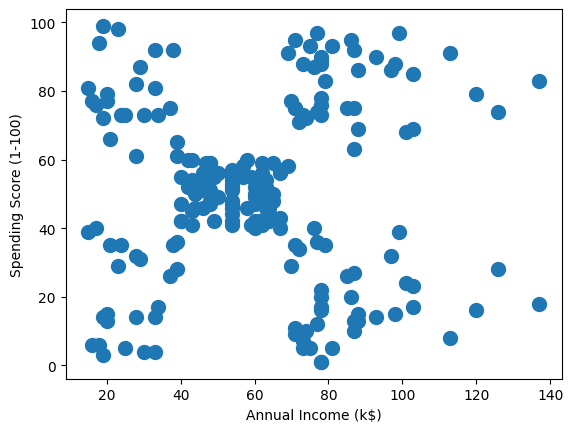

In [6]:

# Pilih fitur yang relevan
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Plot data untuk melihat distribusi awal
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [7]:
# Buat Model KMeans
# Kali ini kita coba menggunakan k=2 - anggap saja kita tidak tahu jumlah label ada 3 :)

from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=3)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

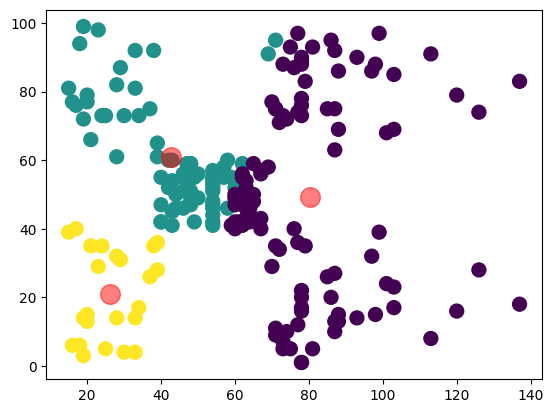

In [8]:

# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [9]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 150538.92938233266


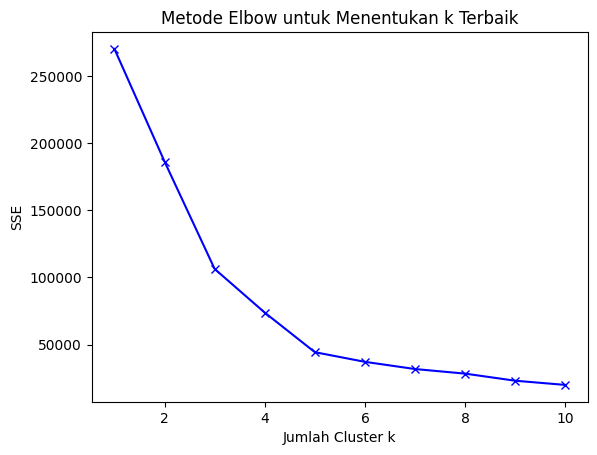

In [13]:
# Tentukan k terbaik menggunakan metode elbow
sse = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot elbow method
plt.plot(K, sse, 'bx-')
plt.xlabel('Jumlah Cluster k')
plt.ylabel('SSE')
plt.title('Metode Elbow untuk Menentukan k Terbaik')
plt.show()


In [14]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=269981.28000000014
k=2; SSE=186206.76002258612
k=3; SSE=106348.37306211119
k=4; SSE=73880.64496247198
k=5; SSE=44454.47647967972
k=6; SSE=37265.86520484345
k=7; SSE=31908.369338905773
k=8; SSE=28499.66418369498
k=9; SSE=23222.11843098762
k=10; SSE=20102.68452126449


## **Model SOM**

In [15]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=8aa1c1ca7c3ef4e36d82c8a30c9363282785384ac06e40e8489927b7a73bc712
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io


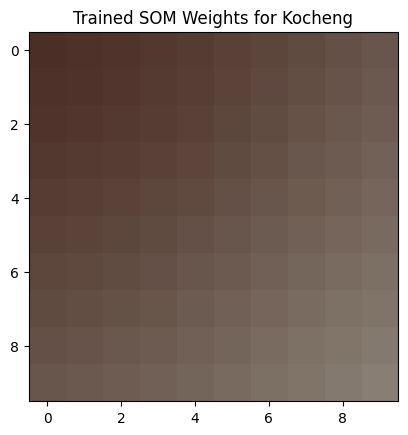

In [18]:

# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights



from skimage import io, transform
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
img_path = "/content/drive/MyDrive/PCVK_IMAGE/kucing1.jpg"
img = io.imread(img_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]
# Resize citra agar latih SOM lebih cepat (misalnya 64x64)
img_resized = transform.resize(img, (64, 64))

# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(img_resized, num_epochs, initial_learning_rate, initial_neighborhood_radius)

# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Kocheng')
plt.show()